## -------------------------------- *Udemy_Course (Online Course Business)* --------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

# (1-2) Definition, Problems, and Goals

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

Machine Learning ini merupakan salah satu model untuk menentukan sukses tidak nya suatu course yang akan dibuka oleh suatu Lembaga Pendidikan atau dalam problem ini ialah MOOC, yang dapat digunakan oleh perusahaan atau lembaga tersebut sebagai bahan pertimbangan dalam me-*release* course baru.

### Problems & Goals

2.1 Problems
- Kualitas Pendidikan Menurun saat diterapkannya Sistem Pendidikan Jarak Jauh berbasis Teknologi (mediaindonesia.com)
- Penurunan partisipan pada Lembaga-lembaga Bimbingan Belajar akibat Covid-19 (sonora.id)
- Kesulitan dalam mencari pekerjaan akibat pandemi covid (kompasiana.com)
- Kesulitan untuk mengetahui course apa yang paling dibutuhkan mereka-mereka yang sedang ingin improving skill (Briyando, Boby.2020)

2.2 Goals
- Membuat model yang dapat memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan
- Mengetahui variabel apa saja yang dapat mempengaruhi sukses/tidaknya suatu course dalam mendapatkan subscribers atau partisipan

2.3 Limitasi
- Model dapat digunakan oleh seluruh perusahaan berbasis Platform Media Pembelajaran Online / MOOC / Bimbel dan perusahaan sejenis lainnya.
- Model hanya dapat memprediksi persentase sukses atau tidaknya course yang akan dibuka.


# Import Package

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler,power_transform, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

------------------------------------------------------------------------------------------------------------------------------------------------------

# (3) Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
df_b = pd.read_csv('df_b.csv', index_col=0)
dfix = pd.read_csv('dfix.csv', index_col=0)

In [6]:
df_b.head()

,price,num_lectures,content_duration,year_p,month_p,date_p,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,,,,,,
1070968,200,51,1.5,2017,1,18,1,0,0,1,1,0,0,0
1113822,75,274,39.0,2017,3,9,1,0,0,1,1,0,0,0
1006314,45,51,2.5,2016,12,19,1,2,0,1,1,0,0,0
1210588,95,36,3.0,2017,5,30,1,0,0,1,1,0,0,0
1011058,200,26,2.0,2016,12,13,0,2,0,1,1,0,0,0


In [7]:
dfix.head()

,year_p,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,
1070968,2017,1,0,0,1,1,0,0,0
1113822,2017,1,0,0,1,1,0,0,0
1006314,2016,1,2,0,1,1,0,0,0
1210588,2017,1,0,0,1,1,0,0,0
1011058,2016,0,2,0,1,1,0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------

# Splitting Data

- **Semua yang berakhiran "b", berarti df_base**
- **Semua yang berakhiran "f", merupakan dfix hasil feature engineering**

In [8]:
Xb = df_b.drop(columns ='is_success')
yb = df_b.is_success

Xf = dfix.drop(columns ='is_success')
yf = dfix.is_success

In [9]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, stratify=yb, test_size = .25, random_state=0)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, stratify=yf, test_size = .25, random_state=0)

In [10]:
Xb_train.shape

(2753, 13)

In [11]:
Xf_train.shape

(2753, 8)

In [12]:
Xf_train.head()

,year_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,
629088,2015,1,0,1,0,0,0,1
544556,2015,0,0,1,1,0,0,0
219838,2014,2,0,1,0,0,0,1
883394,2016,0,0,1,1,0,0,0
735550,2016,0,0,1,1,0,0,0


In [13]:
Xf_train.iloc[0]

year_p              2015
level_enc           1   
is_paid_False       0   
is_paid_True        1   
business_subject    0   
graphic_subject     0   
music_subject       0   
webdev_subject      1   
Name: 629088, dtype: int64

# Modeling

##### Dalam pembuatan model ini, akan dilimitasi bahwa model hanya digunakan sebagai alat untuk memprediksi/mendeteksi sukses tidak nya suatu course yang akan dibuka. 
##### Hasil prediksi akan berupa persentase kesuksesan / keberhasilan dari course yang akan di-*release* dengan feature-feature yang tersedia

- Dalam penggunaan algoritma untuk membuat model **akan banyak classification report, confusion matrix, serta accuracy score dan roc_auc_score yang dihasilkan**. Oleh karena itu akan dijelaskan terlebih dahulu disini, sehingga ini dapat diterapkan ke setiap pembacaan classification report, confusion matrix, serta accuracy and roc_auc_score

![ini image](https://i.ibb.co/jWc7mtX/Confusion-matrix.png)

### Penjelasan Classification Report
1. recall 0 (recall negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah aktual negatif (TN + FP)
2. recall 1 (recall positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah aktual positif (TP + FN)
3. precision 0 (precision negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah tebakan negatif (TN + FN)
4. precision 1 (precision positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah tebakan positif (TP + FP)
5. Accuracy => seluruh tebakan benar dibandingkan seluruh seluruh data

- Dikarenakan dataset yang digunakan memiliki target yang balance, maka accuracy dapat juga di pertimbangkan sebagai penentu ketepatan model
- Fokus model ialah untuk memperoleh recall negatif dan akurasi setinggi mungkin, sehingga False Positif dapat dihindari.
- Alasan mengapa False Positif perlu dihindari dikarenakan:
  - Course yang actualnya **SUKSES (1)** ditebak **TIDAK SUKSES(0)** (FN), perusahaan hanya rugi karena kehilangan kesempatan meraup keuntungan.
  - Sedangkan ketika course yang actualnya **TIDAK SUKSES (0)** ditebak **SUKSES(1)**, maka perusahaan akan rugi karena kehilangan cost yang telah banyak dikeluarkan, apalagi jika lecture yang dikontrak banyak, maka mendapat kerugian juga karena sudang menggaji nya. Oleh karena itu kerugian ini lah yang harus dihindari
- Artinya tujuan **pembuatan model akan dicari yang recall 0 dan accuracy nya tinggi**

### Penjelasan Confusion Matrix
1. TP ==> ialah ketika aktual positif ditebak positif
2. FP ==> ialah ketika aktual negatif ditebak positif
3. TN ==> ialah ketika aktual negatif ditebak negatif
4. FN ==> ialah ketika aktual positif ditebak negatif


# (10-11, 14-15) Training with Base and Complex Model

### Model 1 - Logistic Regeression

### 1. Base

In [101]:
model_b1 = LogisticRegression()
model_b1.fit(Xb_train,yb_train)

LogisticRegression()

In [102]:
yb1_pred = model_b1.predict(Xb_test)
yb1_predt = model_b1.predict(Xb_train)

In [103]:
print(classification_report(yb_test, yb1_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       577
           1       0.65      0.62      0.63       341

    accuracy                           0.73       918
   macro avg       0.71      0.71      0.71       918
weighted avg       0.73      0.73      0.73       918



In [104]:
print(classification_report(yb_train, yb1_predt))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1729
           1       0.67      0.59      0.63      1024

    accuracy                           0.74      2753
   macro avg       0.72      0.71      0.72      2753
weighted avg       0.74      0.74      0.74      2753



In [105]:
cbb1 = confusion_matrix(yb_test, yb1_pred, labels=[1, 0])
cb_b1 = pd.DataFrame(cbb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b1

,Pred 1,Pred 0
Act 1,210,131
Act 0,113,464


In [106]:
roc_b1 = roc_auc_score(yb_test, yb1_pred)
recall0_b1 = recall_score(yb_test, yb1_pred, pos_label=0)
FNb1= cb_b1['Pred 0'].iloc[0]
FPb1 = cb_b1['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [107]:
model_f1 = LogisticRegression()
model_f1.fit(Xf_train,yf_train)

LogisticRegression()

In [108]:
yf1_pred = model_f1.predict(Xf_test)
yf1_predt = model_f1.predict(Xf_train)

In [109]:
print(classification_report(yf_test, yf1_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [110]:
print(classification_report(yf_train, yf1_predt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1729
           1       0.68      0.67      0.67      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.74      0.74      2753
weighted avg       0.76      0.76      0.76      2753



In [111]:
cfb1 = confusion_matrix(yf_test, yf1_pred, labels=[1, 0])
cf_b1 = pd.DataFrame(cfb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b1

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [112]:
roc_f1 = roc_auc_score(yf_test, yf1_pred)
recall0_f1 = recall_score(yf_test, yf1_pred, pos_label=0)
FNf1= cf_b1['Pred 0'].iloc[0]
FPf1= cf_b1['Pred 1'].iloc[1]

### Model 2 - XGB Classifier

### 1. Base

In [113]:
model_b2 = XGBClassifier()
model_b2.fit(Xb_train,yb_train)

XGBClassifier()

In [114]:
yb2_pred = model_b2.predict(Xb_test)
yb2_predt = model_b2.predict(Xb_train)

In [115]:
print(classification_report(yb_test, yb2_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       577
           1       0.71      0.66      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [116]:
print(classification_report(yb_train, yb2_predt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1729
           1       0.78      0.71      0.74      1024

    accuracy                           0.82      2753
   macro avg       0.81      0.79      0.80      2753
weighted avg       0.81      0.82      0.81      2753



In [117]:
roc_auc_score(yb_test, yb2_pred)

0.7501893198208958

In [118]:
roc_auc_score(yb_train, yb2_predt)

0.7937634425607286

In [119]:
cbb2 = confusion_matrix(yb_test, yb2_pred, labels=[1, 0])
cb_b2 = pd.DataFrame(cbb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b2

,Pred 1,Pred 0
Act 1,225,116
Act 0,92,485


In [120]:
roc_b2 = roc_auc_score(yb_test, yb2_pred)
recall0_b2 = recall_score(yb_test, yb2_pred, pos_label=0)
FNb2= cb_b2['Pred 0'].iloc[0]
FPb2 = cb_b2['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [121]:
model_f2 = XGBClassifier()
model_f2.fit(Xf_train,yf_train)

XGBClassifier()

In [122]:
yf2_pred = model_f2.predict(Xf_test)
yf2_predt = model_f2.predict(Xf_train)

In [123]:
print(classification_report(yf_test, yf2_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       577
           1       0.71      0.65      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [124]:
print(classification_report(yf_train, yf2_predt))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1729
           1       0.72      0.61      0.66      1024

    accuracy                           0.77      2753
   macro avg       0.75      0.73      0.74      2753
weighted avg       0.76      0.77      0.76      2753



In [125]:
cfb2 = confusion_matrix(yf_test, yf2_pred, labels=[1, 0])
cf_b2 = pd.DataFrame(cfb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b2

,Pred 1,Pred 0
Act 1,222,119
Act 0,91,486


In [126]:
roc_f2 = roc_auc_score(yf_test, yf2_pred)
recall0_f2 = recall_score(yf_test, yf2_pred, pos_label=0)
FNf2= cf_b2['Pred 0'].iloc[0]
FPf2 = cf_b2['Pred 1'].iloc[1]

### Model 3 - KNN Classifier

### 1. Base

In [127]:
model_b3 = KNeighborsClassifier()
model_b3.fit(Xb_train,yb_train)

KNeighborsClassifier()

In [128]:
yb3_pred = model_b3.predict(Xb_test)
yb3_predt = model_b3.predict(Xb_train)

In [129]:
print(classification_report(yb_test, yb3_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       577
           1       0.54      0.47      0.50       341

    accuracy                           0.65       918
   macro avg       0.62      0.62      0.62       918
weighted avg       0.65      0.65      0.65       918



In [130]:
print(classification_report(yb_train, yb3_predt))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1729
           1       0.73      0.61      0.66      1024

    accuracy                           0.77      2753
   macro avg       0.76      0.74      0.74      2753
weighted avg       0.77      0.77      0.77      2753



In [131]:
cbb3 = confusion_matrix(yb_test, yb3_pred, labels=[1, 0])
cb_b3 = pd.DataFrame(cbb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b3

,Pred 1,Pred 0
Act 1,159,182
Act 0,135,442


In [132]:
roc_b3 = roc_auc_score(yb_test, yb3_pred)
recall0_b3 = recall_score(yb_test, yb3_pred, pos_label=0)
FNb3= cb_b3['Pred 0'].iloc[0]
FPb3 = cb_b3['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [133]:
model_f3 = KNeighborsClassifier()
model_f3.fit(Xf_train,yf_train)

KNeighborsClassifier()

In [134]:
yf3_pred = model_f3.predict(Xf_test)
yf3_predt = model_f3.predict(Xf_train)

In [135]:
print(classification_report(yf_test, yf3_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       577
           1       0.66      0.66      0.66       341

    accuracy                           0.75       918
   macro avg       0.73      0.73      0.73       918
weighted avg       0.75      0.75      0.75       918



In [136]:
print(classification_report(yf_train, yf3_predt))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1729
           1       0.68      0.65      0.66      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.73      0.74      2753
weighted avg       0.75      0.76      0.75      2753



In [137]:
cfb3 = confusion_matrix(yf_test, yf3_pred, labels=[1, 0])
cf_b3 = pd.DataFrame(cfb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b3

,Pred 1,Pred 0
Act 1,226,115
Act 0,118,459


In [138]:
roc_f3 = roc_auc_score(yf_test, yf3_pred)
recall0_f3 = recall_score(yf_test, yf3_pred, pos_label=0)
FNf3= cf_b3['Pred 0'].iloc[0]
FPf3 = cf_b3['Pred 1'].iloc[1]

# Preprocessing

### A. Scalling

- Dikarenakan dataset terdapat banyak outlier dan target tidak terdistribusi normal, maka digunakan lah "Robust Scaller"

In [137]:
scaler = RobustScaler()

In [138]:
Xb_scaled = scaler.fit_transform(Xb_train)
Xf_scaled = scaler.fit_transform(Xf_train)
Xb_tests = scaler.fit_transform(Xb_test)
Xf_tests = scaler.fit_transform(Xf_test)

### LogisticScaled

### 1. Base Scaled

In [139]:
model_b1.fit(Xb_scaled, yb_train)

LogisticRegression()

In [140]:
ybs_pred = model_b1.predict(Xb_tests)
ybs_predt = model_b1.predict(Xb_scaled)

In [141]:
print(classification_report(yb_test, ybs_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [142]:
print(classification_report(yb_train, ybs_predt))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1729
           1       0.73      0.62      0.67      1024

    accuracy                           0.77      2753
   macro avg       0.76      0.74      0.75      2753
weighted avg       0.77      0.77      0.77      2753



In [143]:
cbls = confusion_matrix(yb_test, ybs_pred, labels=[1, 0])
cb_ls = pd.DataFrame(cbls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_ls

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [144]:
roc_bls = roc_auc_score(yb_test, ybs_pred)
recall0_bls = recall_score(yb_test, ybs_pred, pos_label=0)
FNbls= cb_ls['Pred 0'].iloc[0]
FPbls = cb_ls['Pred 1'].iloc[1]

### 2. Complex (dfix Scaled)

In [145]:
model_f1.fit(Xf_scaled, yf_train)

LogisticRegression()

In [146]:
yfs_pred = model_f1.predict(Xf_tests)
yfs_predt = model_f1.predict(Xf_scaled)

In [147]:
print(classification_report(yf_test, yfs_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [148]:
print(classification_report(yf_train, yfs_predt))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1729
           1       0.70      0.63      0.66      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.73      0.74      2753
weighted avg       0.76      0.76      0.76      2753



In [149]:
cfls = confusion_matrix(yf_test, yfs_pred, labels=[1, 0])
cf_ls = pd.DataFrame(cfls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_ls

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [150]:
roc_fls = roc_auc_score(yf_test, yfs_pred)
recall0_fls = recall_score(yf_test, yfs_pred, pos_label=0)
FNfls= cf_ls['Pred 0'].iloc[0]
FPfls = cf_ls['Pred 1'].iloc[1]

### B. Manual Tunning KNN Scaled

### 1. Base

In [151]:
train_score3 = []
test_score3 = []

for k in range (1, 100, 2):
    knn3 = KNeighborsClassifier(n_neighbors= k)
    knn3.fit(Xb_scaled, yb_train)
#     recall_score(y_test, y_predict)
    train_score3.append(knn3.score(Xb_scaled, yb_train))
    test_score3.append(knn3.score(Xb_tests, yb_test))

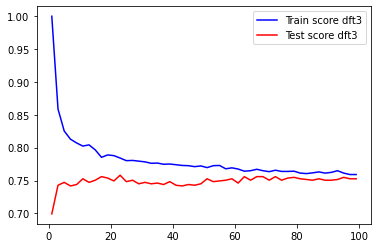

In [152]:
plt.plot(range(1, 100, 2), train_score3, 'b', label='Train score dft3')
plt.plot(range(1, 100, 2), test_score3, 'r', label='Test score dft3')
plt.legend()
plt.show()

In [153]:
print(test_score3)

[0.6993464052287581, 0.7429193899782135, 0.7472766884531591, 0.7418300653594772, 0.7440087145969498, 0.7527233115468409, 0.7472766884531591, 0.7505446623093682, 0.7559912854030502, 0.7538126361655774, 0.7494553376906318, 0.7581699346405228, 0.7483660130718954, 0.7505446623093682, 0.7450980392156863, 0.7472766884531591, 0.7450980392156863, 0.7461873638344226, 0.7440087145969498, 0.7483660130718954, 0.7429193899782135, 0.7418300653594772, 0.7440087145969498, 0.7429193899782135, 0.7450980392156863, 0.7527233115468409, 0.7483660130718954, 0.7494553376906318, 0.7505446623093682, 0.7527233115468409, 0.7461873638344226, 0.7559912854030502, 0.7505446623093682, 0.7559912854030502, 0.7559912854030502, 0.7505446623093682, 0.7559912854030502, 0.7505446623093682, 0.7538126361655774, 0.7549019607843137, 0.7527233115468409, 0.7516339869281046, 0.7505446623093682, 0.7527233115468409, 0.7505446623093682, 0.7505446623093682, 0.7516339869281046, 0.7549019607843137, 0.7527233115468409, 0.7527233115468409]

In [154]:
np.max(test_score3)

0.7581699346405228

In [155]:
k = []
for i in range(1, 100, 2):
    k.append(i)
print(k)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [156]:
n = k[np.argmax(test_score3)]

In [157]:
modelknn_s3 = KNeighborsClassifier(n_neighbors=n)
modelknn_s3.fit(Xb_scaled, yb_train)

KNeighborsClassifier(n_neighbors=23)

In [158]:
y_predk_s3 = modelknn_s3.predict(Xb_tests)

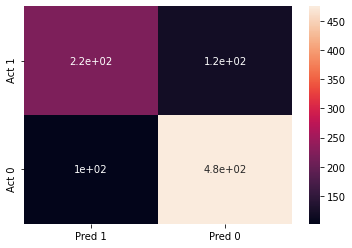

In [159]:
cks3 = confusion_matrix(yb_test, y_predk_s3, labels=[1, 0])
cknns3 = pd.DataFrame(cks3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
sns.heatmap(cknns3,annot=True )

In [160]:
print(classification_report(yb_test, y_predk_s3))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       577
           1       0.68      0.65      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



# (12-13, 14-15) Hyperparameter Tunning

### Logistic Regression

### 1. Base hyper

In [161]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [162]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [163]:
modelLRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([384, 322, 387, 343, 385, 391, 391, 391, 392, 381]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [164]:
modelLGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1915 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3890 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4035 out of 4050 | elapsed:  2.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:  2.0min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([384, 322, 387, 343, 385, 391, 391, 391, 392, 381]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [165]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 384,
 'l1_ratio': 0.001}

In [166]:
modelLGS.best_params_

{'l1_ratio': 0.001,
 'max_iter': 384,
 'multi_class': 'multinomial',
 'penalty': 'l2'}

In [167]:
yblh_predRS = modelLRS.predict(Xb_test)
yblh_predGS = modelLGS.predict(Xb_test)
yblh_predRSt = modelLRS.predict(Xb_train)
yblh_predGSt = modelLGS.predict(Xb_train)

In [168]:
print(classification_report(yb_test, yblh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       577
           1       0.67      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.75      0.74       918
weighted avg       0.76      0.76      0.76       918



In [169]:
print(classification_report(yb_test, yblh_predGS))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       577
           1       0.67      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.75      0.74       918
weighted avg       0.76      0.76      0.76       918



In [170]:
cblhRS = confusion_matrix(yb_test, yblh_predRS, labels=[1, 0])
cb_lhRS = pd.DataFrame(cblhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_lhRS

,Pred 1,Pred 0
Act 1,237,104
Act 0,118,459


In [171]:
cblhGS = confusion_matrix(yb_test, yblh_predGS, labels=[1, 0])
cb_lhGS = pd.DataFrame(cblhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_lhGS

,Pred 1,Pred 0
Act 1,237,104
Act 0,118,459


In [172]:
roc_blhRS = roc_auc_score(yb_test, yblh_predRS)
recall0_blhRS = recall_score(yb_test, yblh_predRS, pos_label=0)
roc_blhGS = roc_auc_score(yb_test, yblh_predRS)
recall0_blhGS = recall_score(yb_test, yblh_predRS, pos_label=0)
FNblh_RS = cb_lhRS['Pred 0'].iloc[0]
FPblh_RS = cb_lhRS['Pred 1'].iloc[1]
FNblh_GS = cb_lhGS['Pred 0'].iloc[0]
FPblh_GS = cb_lhGS['Pred 1'].iloc[1]

### 2. Complex hyper

In [173]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [174]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [175]:
modelLRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([386, 300, 391, 324, 388, 346, 328, 319, 381, 385]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [176]:
modelLGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 4035 out of 4050 | elapsed:   27.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   27.9s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([386, 300, 391, 324, 388, 346, 328, 319, 381, 385]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [177]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 388,
 'l1_ratio': 0.3727593720314938}

In [178]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 386, 'multi_class': 'auto', 'penalty': 'l2'}

In [179]:
yflh_predRS = modelLRS.predict(Xf_test)
yflh_predGS = modelLGS.predict(Xf_test)
yflh_predRSt = modelLRS.predict(Xf_train)
yflh_predGSt = modelLGS.predict(Xf_train)

In [180]:
print(classification_report(yf_test, yflh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [181]:
print(classification_report(yf_test, yflh_predGS))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [182]:
cflhRS = confusion_matrix(yf_test, yflh_predRS, labels=[1, 0])
cf_lhRS = pd.DataFrame(cflhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_lhRS

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [183]:
cflhGS = confusion_matrix(yf_test, yflh_predGS, labels=[1, 0])
cf_lhGS = pd.DataFrame(cflhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_lhGS

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [184]:
roc_flhRS = roc_auc_score(yf_test, yflh_predRS)
recall0_flhRS = recall_score(yf_test, yflh_predRS, pos_label=0)
roc_flhGS = roc_auc_score(yf_test, yflh_predGS)
recall0_flhGS = recall_score(yf_test, yflh_predGS, pos_label=0)
FNflh_RS = cf_lhRS['Pred 0'].iloc[0]
FPflh_RS = cf_lhRS['Pred 1'].iloc[1]
FNflh_GS = cf_lhGS['Pred 0'].iloc[0]
FPflh_GS = cf_lhGS['Pred 1'].iloc[1]

### 1. Base

In [185]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [186]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [187]:
modelLRS.fit(Xb_scaled,yb_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([396, 338, 374, 329, 310, 332, 321, 344, 358, 392]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [188]:
modelLGS.fit(Xb_scaled,yb_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   14.7s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([396, 338, 374, 329, 310, 332, 321, 344, 358, 392]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [189]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 344,
 'l1_ratio': 0.004393970560760791}

In [190]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 396, 'multi_class': 'auto', 'penalty': 'l2'}

In [191]:
ybslh_predRS = modelLRS.predict(Xb_tests)
ybslh_predGS = modelLGS.predict(Xb_tests)
ybslh_predRSt = modelLRS.predict(Xb_scaled)
ybslh_predGSt = modelLGS.predict(Xb_scaled)

In [192]:
print(classification_report(yb_test, ybslh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [193]:
print(classification_report(yb_test, ybslh_predGS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [194]:
cbslhRS = confusion_matrix(yb_test, ybslh_predRS, labels=[1, 0])
cbs_lhRS = pd.DataFrame(cbslhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cbs_lhRS

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [195]:
cbslhGS = confusion_matrix(yb_test, ybslh_predGS, labels=[1, 0])
cbs_lhGS = pd.DataFrame(cbslhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cbs_lhGS

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [196]:
roc_bslhRS = roc_auc_score(yb_test, ybslh_predRS)
recall0_bslhRS = recall_score(yb_test, ybslh_predRS, pos_label=0)
roc_bslhGS = roc_auc_score(yb_test, ybslh_predGS)
recall0_bslhGS = recall_score(yb_test, ybslh_predGS, pos_label=0)
FNbslh_RS = cbs_lhRS['Pred 0'].iloc[0]
FPbslh_RS = cbs_lhRS['Pred 1'].iloc[1]
FNbslh_GS = cbs_lhGS['Pred 0'].iloc[0]
FPbslh_GS = cbs_lhGS['Pred 1'].iloc[1]

### 2. Complex (dfix scaled)

In [197]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [198]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [199]:
modelLRS.fit(Xf_scaled,yf_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([366, 355, 376, 369, 379, 372, 374, 371, 307, 397]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [200]:
modelLGS.fit(Xf_scaled,yf_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   11.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([366, 355, 376, 369, 379, 372, 374, 371, 307, 397]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [201]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 379,
 'l1_ratio': 0.0517947467923121}

In [202]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 366, 'multi_class': 'auto', 'penalty': 'l2'}

In [203]:
yfslh_predRS = modelLRS.predict(Xf_tests)
yfslh_predGS = modelLGS.predict(Xf_tests)
yfslh_predRSt = modelLRS.predict(Xf_scaled)
yfslh_predGSt = modelLGS.predict(Xf_scaled)

In [204]:
print(classification_report(yf_test, yfslh_predRS))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [205]:
print(classification_report(yf_test, yfslh_predGS))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [206]:
cfslhRS = confusion_matrix(yf_test, yfslh_predRS, labels=[1, 0])
cfs_lhRS = pd.DataFrame(cfslhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cfs_lhRS

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [207]:
cfslhGS = confusion_matrix(yf_test, yfslh_predGS, labels=[1, 0])
cfs_lhGS = pd.DataFrame(cfslhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cfs_lhGS

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [208]:
roc_fslhRS = roc_auc_score(yf_test, yfslh_predRS)
recall0_fslhRS = recall_score(yf_test, yfslh_predRS, pos_label=0)
roc_fslhGS = roc_auc_score(yf_test, yfslh_predGS)
recall0_fslhGS = recall_score(yf_test, yfslh_predGS, pos_label=0)
FNfslh_RS = cfs_lhRS['Pred 0'].iloc[0]
FPfslh_RS = cfs_lhRS['Pred 1'].iloc[1]
FNfslh_GS = cfs_lhGS['Pred 0'].iloc[0]
FPfslh_GS = cfs_lhGS['Pred 1'].iloc[1]

### XGBClassifier

### 1. Base hyper

In [209]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.random.randint(1,10,10),
    'learning_rate': np.logspace(-3,0,15),
    'n_estimators':np.random.randint(100,200,10),
    'gamma':np.random.randint(1,10,10)
}

In [210]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [211]:
modelXRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': array([5, 8, 4, 2, 9, 2, 1, 8, 3, 4]),
                                        'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_depth': array([6, 3, 5, 4, 3, 9, 2, 2, 1, 7]),
                                        'n_estimators': array([135, 152, 100, 136, 121, 110, 170, 102, 113, 156])})

In [212]:
modelXGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': array([5, 8, 4, 2, 9, 2, 1, 8, 3, 4]),
                         'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_depth': array([6, 3, 5, 4, 3, 9, 2, 2, 1, 7]),
                         'n_estimators': array([135, 152, 100, 136, 121, 110, 170, 102, 113, 156])},
             verbose=1)

In [213]:
modelXRS.best_params_

{'n_estimators': 135,
 'max_depth': 5,
 'learning_rate': 0.011787686347935873,
 'gamma': 5}

In [214]:
modelXGS.best_params_

{'gamma': 1,
 'learning_rate': 0.0517947467923121,
 'max_depth': 4,
 'n_estimators': 113}

In [215]:
ybxh_predRS = modelXRS.predict(Xb_test)
ybxh_predGS = modelXGS.predict(Xb_test)
ybxh_predRSt = modelXRS.predict(Xb_train)
ybxh_predGSt = modelXGS.predict(Xb_train)

In [216]:
print(classification_report(yb_test, ybxh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       577
           1       0.69      0.70      0.69       341

    accuracy                           0.77       918
   macro avg       0.76      0.76      0.76       918
weighted avg       0.77      0.77      0.77       918



In [217]:
print(classification_report(yb_test, ybxh_predGS))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       577
           1       0.69      0.65      0.67       341

    accuracy                           0.76       918
   macro avg       0.75      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [218]:
cbxhRS = confusion_matrix(yb_test, ybxh_predRS, labels=[1, 0])
cb_xhRS = pd.DataFrame(cbxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhRS

,Pred 1,Pred 0
Act 1,238,103
Act 0,107,470


In [219]:
cbxhGS = confusion_matrix(yb_test, ybxh_predGS, labels=[1, 0])
cb_xhGS = pd.DataFrame(cbxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhGS

,Pred 1,Pred 0
Act 1,221,120
Act 0,97,480


In [220]:
roc_bxhRS = roc_auc_score(yb_test, ybxh_predRS)
recall0_bxhRS = recall_score(yb_test, ybxh_predRS, pos_label=0)
roc_bxhGS = roc_auc_score(yb_test, ybxh_predGS)
recall0_bxhGS = recall_score(yb_test, ybxh_predGS, pos_label=0)
FNbxh_RS = cb_xhRS['Pred 0'].iloc[0]
FPbxh_RS = cb_xhRS['Pred 1'].iloc[1]
FNbxh_GS = cb_xhGS['Pred 0'].iloc[0]
FPbxh_GS = cb_xhGS['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [221]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.random.randint(1,10,10),
    'learning_rate': np.logspace(-3,0,15),
    'n_estimators':np.random.randint(100,200,10),
    'gamma':np.random.randint(1,10,10)
}

In [222]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [223]:
modelXRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': array([9, 4, 6, 9, 2, 8, 4, 7, 4, 7]),
                                        'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_depth': array([2, 4, 2, 1, 8, 7, 5, 1, 9, 8]),
                                        'n_estimators': array([110, 134, 153, 177, 118, 152, 154, 172, 139, 140])})

In [224]:
modelXGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': array([9, 4, 6, 9, 2, 8, 4, 7, 4, 7]),
                         'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_depth': array([2, 4, 2, 1, 8, 7, 5, 1, 9, 8]),
                         'n_estimators': array([110, 134, 153, 177, 118, 152, 154, 172, 139, 140])},
             verbose=1)

In [225]:
modelXRS.best_params_

{'n_estimators': 139,
 'max_depth': 7,
 'learning_rate': 0.03162277660168379,
 'gamma': 2}

In [226]:
modelXGS.best_params_

{'gamma': 4,
 'learning_rate': 0.03162277660168379,
 'max_depth': 8,
 'n_estimators': 153}

In [227]:
yfxh_predRS = modelXRS.predict(Xf_test)
yfxh_predGS = modelXGS.predict(Xf_test)
yfxh_predRSt = modelXRS.predict(Xf_train)
yfxh_predGSt = modelXGS.predict(Xf_train)

In [228]:
print(classification_report(yf_test, yfxh_predRS))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       577
           1       0.68      0.67      0.68       341

    accuracy                           0.76       918
   macro avg       0.75      0.74      0.75       918
weighted avg       0.76      0.76      0.76       918



In [229]:
print(classification_report(yf_test, yfxh_predGS))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       577
           1       0.68      0.68      0.68       341

    accuracy                           0.76       918
   macro avg       0.75      0.75      0.75       918
weighted avg       0.76      0.76      0.76       918



In [230]:
cfxhRS = confusion_matrix(yf_test, yfxh_predRS, labels=[1, 0])
cf_xhRS = pd.DataFrame(cfxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhRS

,Pred 1,Pred 0
Act 1,230,111
Act 0,107,470


In [231]:
cfxhGS = confusion_matrix(yf_test, yfxh_predGS, labels=[1, 0])
cf_xhGS = pd.DataFrame(cfxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhGS

,Pred 1,Pred 0
Act 1,233,108
Act 0,109,468


In [232]:
roc_fxhRS = roc_auc_score(yf_test, yfxh_predRS)
recall0_fxhRS = recall_score(yf_test, yfxh_predRS, pos_label=0)
roc_fxhGS = roc_auc_score(yf_test, yfxh_predGS)
recall0_fxhGS = recall_score(yf_test, yfxh_predGS, pos_label=0)
FNfxh_RS = cf_xhRS['Pred 0'].iloc[0]
FPfxh_RS = cf_xhRS['Pred 1'].iloc[1]
FNfxh_GS = cf_xhGS['Pred 0'].iloc[0]
FPfxh_GS = cf_xhGS['Pred 1'].iloc[1]

### KNN Classifier

### 1. Base hyper

In [233]:
modelkfh = KNeighborsClassifier()
paramkf = {
    "n_neighbors" : np.random.randint(100,200,10),
    "weights" : ["uniform", "distance"],
    "p" : np.random.randint(1,10,10)
}

In [234]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [235]:
modelKRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([185, 121, 154, 125, 109, 106, 133, 174, 158, 127]),
                                        'p': array([2, 4, 2, 2, 4, 8, 2, 4, 8, 1]),
                                        'weights': ['uniform', 'distance']})

In [236]:
modelKGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   23.5s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([185, 121, 154, 125, 109, 106, 133, 174, 158, 127]),
                         'p': array([2, 4, 2, 2, 4, 8, 2, 4, 8, 1]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [237]:
modelKRS.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 154}

In [238]:
modelKGS.best_params_

{'n_neighbors': 133, 'p': 1, 'weights': 'distance'}

In [239]:
ybkh_predRS = modelKRS.predict(Xb_test)
ybkh_predGS = modelKGS.predict(Xb_test)
ybkh_predRSt = modelKRS.predict(Xb_train)
ybkh_predGSt = modelKGS.predict(Xb_train)

In [277]:
print(classification_report(yb_train, ybkh_predRSt))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1729
           1       0.75      0.33      0.45      1024

    accuracy                           0.71      2753
   macro avg       0.72      0.63      0.63      2753
weighted avg       0.72      0.71      0.67      2753



In [281]:
roc_auc_score(yb_train, ybkh_predRSt)

0.630118904532967

In [240]:
print(classification_report(yb_test, ybkh_predRS))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       577
           1       0.73      0.33      0.45       341

    accuracy                           0.70       918
   macro avg       0.71      0.63      0.62       918
weighted avg       0.71      0.70      0.67       918



In [282]:
roc_auc_score(yb_test, ybkh_predRS)

0.6263614509267776

In [241]:
print(classification_report(yb_test, ybkh_predGS))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       577
           1       0.71      0.34      0.46       341

    accuracy                           0.70       918
   macro avg       0.70      0.63      0.63       918
weighted avg       0.70      0.70      0.67       918



In [ ]:
cbkhRS = confusion_matrix(yb_test, ybkh_predRS, labels=[1, 0])
cb_khRS = pd.DataFrame(cbkhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khRS

In [243]:
cbkhGS = confusion_matrix(yb_test, ybkh_predGS, labels=[1, 0])
cb_khGS = pd.DataFrame(cbkhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khGS

,Pred 1,Pred 0
Act 1,115,226
Act 0,48,529


In [244]:
roc_bkhRS = roc_auc_score(yb_test, ybkh_predRS)
recall0_bkhRS = recall_score(yb_test, ybkh_predRS, pos_label=0)
roc_bkhGS = roc_auc_score(yb_test, ybkh_predGS)
recall0_bkhGS = recall_score(yb_test, ybkh_predGS, pos_label=0)
FNbkh_RS = cb_khRS['Pred 0'].iloc[0]
FPbkh_RS = cb_khRS['Pred 1'].iloc[1]
FNbkh_GS = cb_khGS['Pred 0'].iloc[0]
FPbkh_GS = cb_khGS['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [245]:
modelkfh = KNeighborsClassifier()
paramkf = {
    "n_neighbors" : np.random.randint(100,200,10),
    "weights" : ["uniform", "distance"],
    "p" : np.random.randint(1,10,10)
}

In [246]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [247]:
modelKRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([125, 152, 164, 138, 103, 116, 179, 185, 105, 119]),
                                        'p': array([8, 8, 1, 6, 8, 6, 6, 5, 5, 6]),
                                        'weights': ['uniform', 'distance']})

In [248]:
modelKGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   27.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([125, 152, 164, 138, 103, 116, 179, 185, 105, 119]),
                         'p': array([8, 8, 1, 6, 8, 6, 6, 5, 5, 6]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [249]:
modelKRS.best_params_

{'weights': 'distance', 'p': 6, 'n_neighbors': 138}

In [250]:
modelKGS.best_params_

{'n_neighbors': 125, 'p': 1, 'weights': 'distance'}

In [251]:
yfkh_predRS = modelKRS.predict(Xf_test)
yfkh_predGS = modelKGS.predict(Xf_test)
yfkh_predRSt = modelKRS.predict(Xf_train)
yfkh_predGSt = modelKGS.predict(Xf_train)

In [252]:
print(classification_report(yf_test, yfkh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.74       918
weighted avg       0.75      0.76      0.75       918



In [253]:
print(classification_report(yf_test, yfkh_predGS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.68      0.63      0.66       341

    accuracy                           0.75       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.75      0.75       918



In [254]:
cfkhRS = confusion_matrix(yf_test, yfkh_predRS, labels=[1, 0])
cf_khRS = pd.DataFrame(cfkhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_khRS

,Pred 1,Pred 0
Act 1,216,125
Act 0,98,479


In [255]:
cfkhGS = confusion_matrix(yf_test, yfkh_predGS, labels=[1, 0])
cf_khGS = pd.DataFrame(cfkhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_khGS

,Pred 1,Pred 0
Act 1,216,125
Act 0,100,477


In [256]:
roc_fkhRS = roc_auc_score(yf_test, yfkh_predRS)
recall0_fkhRS = recall_score(yf_test, yfkh_predRS, pos_label=0)
roc_fkhGS = roc_auc_score(yf_test, yfkh_predGS)
recall0_fkhGS = recall_score(yf_test, yfkh_predGS, pos_label=0)
FNfkh_RS = cf_khRS['Pred 0'].iloc[0]
FPfkh_RS = cf_khRS['Pred 1'].iloc[1]
FNfkh_GS = cf_khGS['Pred 0'].iloc[0]
FPfkh_GS = cf_khGS['Pred 1'].iloc[1]

# (16-17) Evaluation & Model Selection

In [257]:
score = pd.DataFrame(
    index=['roc_auc', 'recall_0', 'False Negatif','False Positif'], 
    columns=['b1','f1','b2','f2','b3','f3','bls','fls','blhRS','blhGS','flhRS','flhGS','bslhRS','bslhGS','fslhRS','fslhGS','bxhRS','bxhGS','fxhRS','fxhGS','bkhRS','bkhGS','fkhRS','fkhGS'],
    data=[
        [roc_b1,roc_f1,roc_b2,roc_f2,roc_b3,roc_f3,roc_bls,roc_fls,roc_blhRS,roc_blhGS,roc_flhRS,roc_flhGS,roc_bslhRS,roc_bslhGS,roc_fslhRS,roc_fslhGS,roc_bxhRS,roc_bxhGS,roc_fxhRS,roc_fxhGS,roc_bkhRS,roc_bkhGS,roc_fkhRS,roc_fkhGS],
        [recall0_b1,recall0_f1,recall0_b2,recall0_f2,recall0_b3,recall0_f3,recall0_bls,recall0_fls,recall0_blhRS,recall0_blhGS,recall0_flhRS,recall0_flhGS,recall0_bslhRS,recall0_bslhGS,recall0_fslhRS,recall0_fslhGS,recall0_bxhRS,recall0_bxhGS,recall0_fxhRS,recall0_fxhGS,recall0_bkhRS,recall0_bkhGS,recall0_fkhRS,recall0_fkhGS],
        [FNb1,FNf1,FNb2,FNf2,FNb3,FNf3,FNbls,FNfls,FNblh_RS,FNblh_GS,FNflh_RS,FNflh_GS,FNbslh_RS,FNbslh_GS,FNfslh_RS,FNfslh_GS,FNbxh_RS,FNbxh_GS,FNfxh_RS,FNfxh_GS,FNbkh_RS,FNbkh_GS,FNfkh_RS,FNfkh_GS],
        [FPb1,FPf1,FPb2,FPf2,FPb3,FPf3,FPbls,FPfls,FPblh_RS,FPblh_GS,FPflh_RS,FPflh_GS,FPbslh_RS,FPbslh_GS,FPfslh_RS,FPfslh_GS,FPbxh_RS,FPbxh_GS,FPfxh_RS,FPfxh_GS,FPbkh_RS,FPbkh_GS,FPfkh_RS,FPfkh_GS]
    ]).T

In [260]:
round(score,3).sort_values(by='recall_0', ascending=False)

,roc_auc,recall_0,False Negatif,False Positif
bkhRS,0.626,0.927,230.0,42.0
bkhGS,0.627,0.917,226.0,48.0
f2,0.747,0.842,119.0,91.0
b2,0.750,0.841,116.0,92.0
bxhGS,0.740,0.832,120.0,97.0
fkhRS,0.732,0.830,125.0,98.0
bslhRS,0.731,0.828,125.0,99.0
bslhGS,0.731,0.828,125.0,99.0
bls,0.731,0.828,125.0,99.0
fkhGS,0.730,0.827,125.0,100.0


- Berdasarkan tabel score di atas, 2 algoritma terbaik ialah KNN hyper (jika dilihat dari jumlah False Positif nya), dan XGBoost Classifier (jika dilihat roc_auc dan Jumlah Tebakan Salah nya). Memang berdasarkan False positif, model hyper knn dapat memperoleh false positif yang paling kecil, akan tetapi jumlah seluruh tebakan salah nya pun menjadi sangat besar (272 False), oleh karena itulah nilai roc_auc nya lebih kecil dibandingkan XGBoost. XGBoost memiliki nilai roc_auc yang bisa dibilang cukup lebih besar dibandingkan hyper knn, artinya model XGBoost sudah dapat memisahkan jawaban 0 dan 1 secara tepat sesuai aktualnya. Sehingga jumlah tebakan benar nya pun lebih besar.

#### Oleh karena itu, Model terpilih ialah XGBoost Base

# (18-19) Export & Try Model

In [359]:
modelbest = XGBClassifier()

In [360]:
modelbest.fit(Xb_train, yb_train)

XGBClassifier()

In [361]:
y_pred = modelbest.predict(Xb_test)
print(classification_report(yb_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       577
           1       0.71      0.66      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [362]:
joblib.dump(model_b2,'xgbase')

['xgbase']

In [363]:
bestmodel = joblib.load('xgbase')

In [383]:
sample = pd.DataFrame([Xb_test.iloc[1]])
sample

,price,num_lectures,content_duration,year_p,month_p,date_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
1114164,20.0,11.0,1.0,2017.0,2.0,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [389]:
Xb_test.head()

,price,num_lectures,content_duration,year_p,month_p,date_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,,,,,
683394,20,23,1.5,2015,12,2,1,0,1,0,0,0,1
1114164,20,11,1.0,2017,2,20,0,0,1,0,1,0,0
897314,65,52,3.5,2016,7,18,2,0,1,0,0,0,1
944906,40,12,1.0,2016,9,9,1,0,1,0,0,0,1
951608,80,38,2.5,2016,11,16,1,0,1,0,0,1,0


In [ ]:
predict_ = bestmodel.predict_proba(sample)

In [407]:
hasil_predict = predict_[0][1]
hasil_predict

0.2372956

In [381]:
yb_test.iloc[1]

0

In [384]:
Xb_test.columns

Index(['price', 'num_lectures', 'content_duration', 'year_p', 'month_p',
       'date_p', 'level_enc', 'is_paid_False', 'is_paid_True',
       'business_subject', 'graphic_subject', 'music_subject',
       'webdev_subject'],
      dtype='object')

In [392]:
course_id=1123423
price = 5
num_lectures=2
content_duration=3.5
year_p = 2020
month_p=8
date_p=31
level_enc=1
is_paid_False=0
is_paid_True=1
business_subject=0
graphic_subject=0
music_subject=1
webdev_subject=0

In [405]:
sample1 = pd.DataFrame(
            columns=[course_id],
            index=[
                'price', 'num_lectures', 'content_duration', 'year_p', 'month_p',
                'date_p', 'level_enc', 'is_paid_False', 'is_paid_True',
                'business_subject', 'graphic_subject', 'music_subject',
                'webdev_subject'
            ],
            data = [price,num_lectures,content_duration,year_p,month_p,date_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject]
        ).T
sample1

,price,num_lectures,content_duration,year_p,month_p,date_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
1123423,5.0,2.0,3.5,2020.0,8.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Kesimpulan
- Model ini dapat digunakan untuk memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan menggunakan algoritma XGBClassifier Base dengan **roc_auc 0.750**, **accuracy 77%**, dan **recall_0** serta **recall_1** berturut-turut yaitu **0.84** dan **0.66** 
- Variabel kuat yang menentukan dalam penentuan sukses tidaknya suatu course ialah, **Jumlah Review, Subject Course, Tipe Lisensi (Gratis/Berbayar), dan Level course**

# Saran
- Diperlukan penelitian lebih lanjut terkait batasan penentuan label sukses dan tidak sukses atas jumlah subscriber dalam pembuatan model.
- Diperlukan pengembangan lebih lanjut terkait prediksi jumlah subscriber yang diperoleh agar dapat dilakukan perhitungan loss & profit untuk perusahaan

# Referensi

1. https://mediaindonesia.com/read/detail/321039-dampak-pandemi-kualitas-pendidikan-alami-penurunan
2. https://suteki.co.id/7-dampak-positif-pandemi-covid-19-bagi-dunia-pendidikan/
3. https://www.sonora.id/read/422146758/dampak-pandemi-covid-19-jumlah-siswa-bimbel-turun-signifikan?page=all
4. Zuriati, Suci & Briando, Bobby. (2020). Persepsi Siswa Terhadap Pembelajaran Online Di Masa Pandemi Pada Sekolah Menengah Atas Negeri Empat Tanjungpinang.
5. https://www.kompas.com/tren/read/2020/08/11/102500165/pandemi-covid-19-apa-saja-dampak-pada-sektor-ketenagakerjaan-indonesia-?page=all
6. https://www.merdeka.com/teknologi/bersiaplah-7-tren-teknologi-tahun-2015-ini-akan-mengubah-dunia.html

------------------------------------------------------------------------------------------------------------------------------------------------------